# Linear regression stocks prediction notebook
Uses the API www.alphavantage.co

Set your values in the settings block down below  

|    var   |    type   |      initial value    |             purpose         |
|----------|-----------|-----------------------|-----------------------------|
| numdays  |  integer  |           1000        | number of days to get data from today backwards
| symbols  | str array | ["CRM","ORCL","MSFT"] | list of tickers to download
| get_data |  boolean  |         'false'       | if the data is requested via API or not because I have recent data already

Set the list of tickers in the array below, comma separated  
symbols = ["CRM","ORCL","MSFT"]

Set to true or false to reduce de number of times you consume the API. Set to true at least the first time you run the notebook  
get_data = 'false'

## history
| ver  |     date      |        author       |
|------|---------------|---------------------|
| new  | 03/March/2024 | javier mugueta      |

   

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
import subprocess
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [58]:
#
# SETTINGS
#
# set the number of days at your convenience
numdays = 1000
# set the list of tickers in the array below, comma separated
symbols = ["CRM","ORCL","MSFT"]
# set to true or false to reduce de number of times you consume the API
get_data = 'false'

CRM.csv
ORCL.csv
MSFT.csv


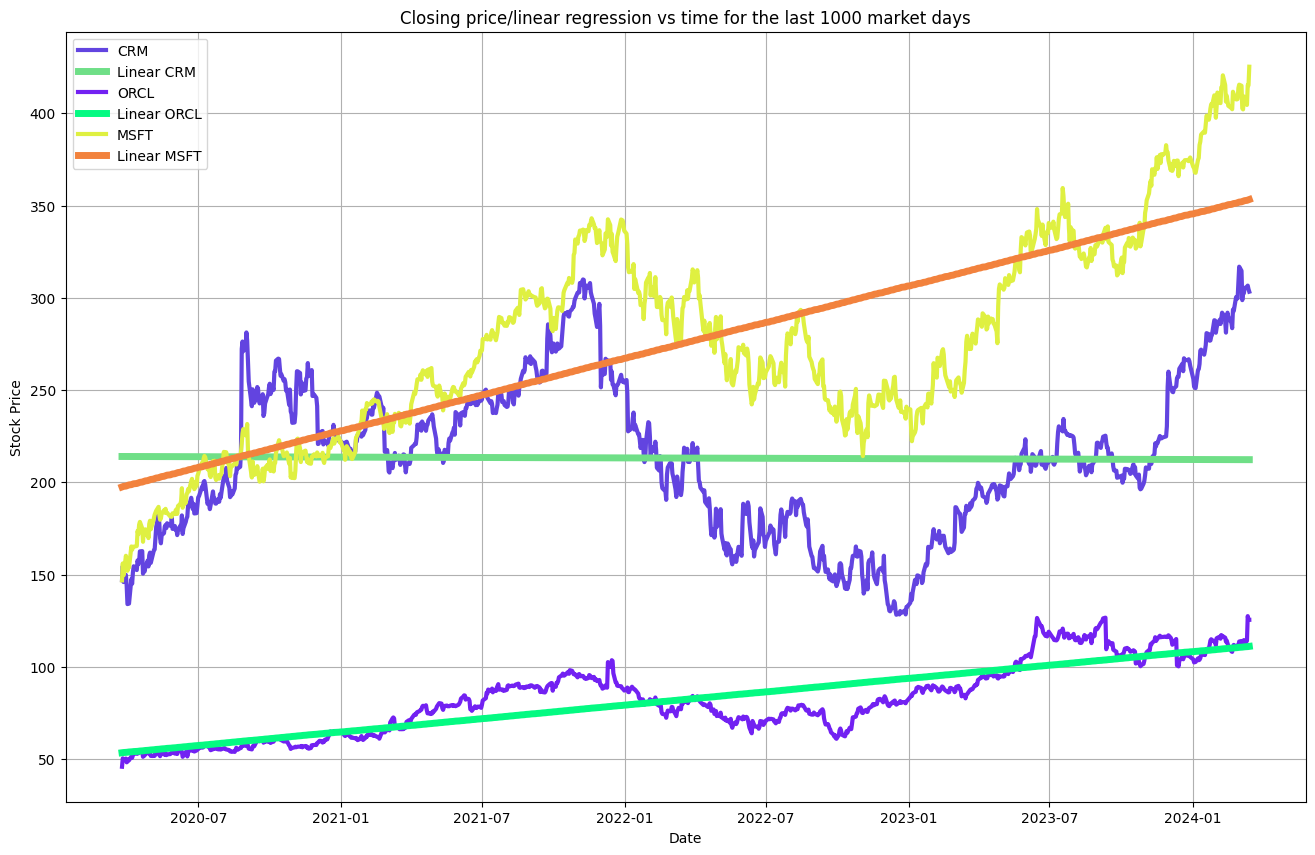

In [59]:
L = len(symbols)
df = [None]*L
X = [None]*L
y = [None]*L
model = [None]*L 
y_pred = [None]*L
#
i = 0
#
plt.figure(1, figsize=(16,10))
plt.title('Closing price/linear regression vs time for the last ' + str(numdays) + ' market days'  )
plt.grid()
plt.xlabel('Date')
plt.ylabel('Stock Price')
#
for x in symbols:
    file = x + ".csv"
    url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=" + symbols[i] + "&apikey=JDD4YNH3L5HDBN37&datatype=csv&outputsize=full"
    print(file)
    if get_data == 'true':
        subprocess.run(["wget", "-O", file, url]) 
    df[i] = pd.read_csv(file,index_col='timestamp',parse_dates=['timestamp'],).drop('volume', axis=1)
    df[i] = df[i].sort_values(by='timestamp',ascending=True)
    df[i] = df[i].tail(numdays)
    df[i]['Time'] = np.arange(len(df[i].index))
    X[i] = df[i].loc[:, ['Time']]  # features
    y[i] = df[i].loc[:, 'close']  # target
    # Train the model
    model[i] = LinearRegression()
    model[i].fit(X[i], y[i])
    # Store the fitted values as a time series with the same time index as
    # the training data
    y_pred[i] = pd.Series(model[i].predict(X[i]), index=X[i].index)
    # Training data
    X[i] = df[i].loc[:, ['Time']]  # features
    y[i] = df[i].loc[:, 'close']  # target
    # Train the model
    model[i] = LinearRegression()
    model[i].fit(X[i], y[i])
    # Store the fitted values as a time series with the same time index as
    # the training data
    y_pred[i] = pd.Series(model[i].predict(X[i]), index=X[i].index)
    #
    col = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(df[i].close, color= col,label= symbols[i],linewidth= 3)
    col = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(y_pred[i], color = col, label= 'Linear ' + symbols[i],linewidth= 5)
    i = i + 1
#
plt.legend()
plt.show()

Thats all folks!